<a href="https://colab.research.google.com/github/Luis-alba-sanchez/Assignement2/blob/main/Lab4_S7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification
In the set of this exercises we will be using tf.keras (a high-level API to build and train models in TensorFlow) and GoogleColab.

# 1. Open a new notebook in GoogleColab for python3. Run the following code for activating tensorflow version 2.0:

In [ ]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# 2. Import tensorflow, keras, numpy and matplot using the following code:


In [ ]:
from __future__ import absolute_import , division , print_function , unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# 3. Check your tensorflow version using:


In [ ]:
print(tf.__version__)

2.13.0


# 4. Import the cifra10 data set. The CIFAR-10 dataset consists of 60000 32 × 32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images: cifar10

In [ ]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

170498071/170498071 [==============================] - 2s 0us/step


# 5. Before using a dataset, the datatype should be checked. Test type(cifar10 data) for verifying the variable type. len(cifar10 data) is another command for checking the data size.

In [ ]:
type(cifar10_data)

tuple

In [ ]:
len(cifar10_data)

2

6. Load train and test images and labels with:



In [ ]:
(train_images , train_labels),(test_images , test_labels) = cifar10_data

7. The images are 32 × 32 NumPy arrays, with pixel values ranging from 0 to 255. You can check an example with:



In [ ]:
print(train_images[0])
print(train_images[0].shape)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


In [ ]:
 class_names = ['airplane' ,
                'automobile' ,
                 'bird' , 'cat' ,
                 'deer' , 'dog' ,
                 'frog' , 'horse' ,
                 'ship' , 'truck']
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

8. Before training the model, explore the datasets. Number of train and test points, their array size and etc.

In [ ]:
print("nbr train img : ", len(train_images))
print("shape train img : ", train_images.shape)
print("nbr train labels : ", len(train_labels))
print("list train lables : ", train_labels)

nbr train img :  50000
shape train img :  (50000, 32, 32, 3)
nbr train labels :  50000
list train lables :  [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [ ]:
print("nbr test img : ", len(test_images))
print("shape test img : ", test_images.shape)
print("nbr test labels : ", len(test_labels))
print("list test lables : ", test_labels)

nbr test img :  10000
shape test img :  (10000, 32, 32, 3)
nbr test labels :  10000
list test lables :  [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


9. An interesting fact about the image is that you can plot the image. It is possible using the following:

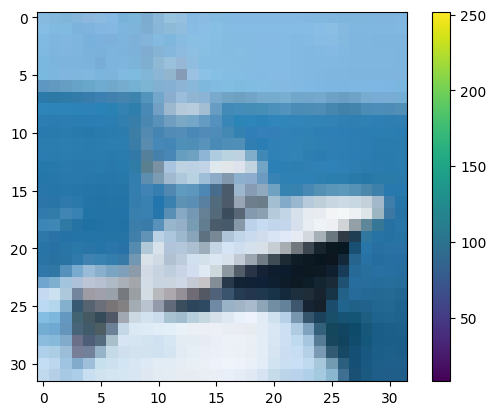

array([8], dtype=uint8)

In [ ]:
index = 8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[index]

10. To verify that the data is in the correct format and that you’re ready to build and train the network, let’s display the first 25 images from the training set and display the class name below each image. To do so use the following commands:

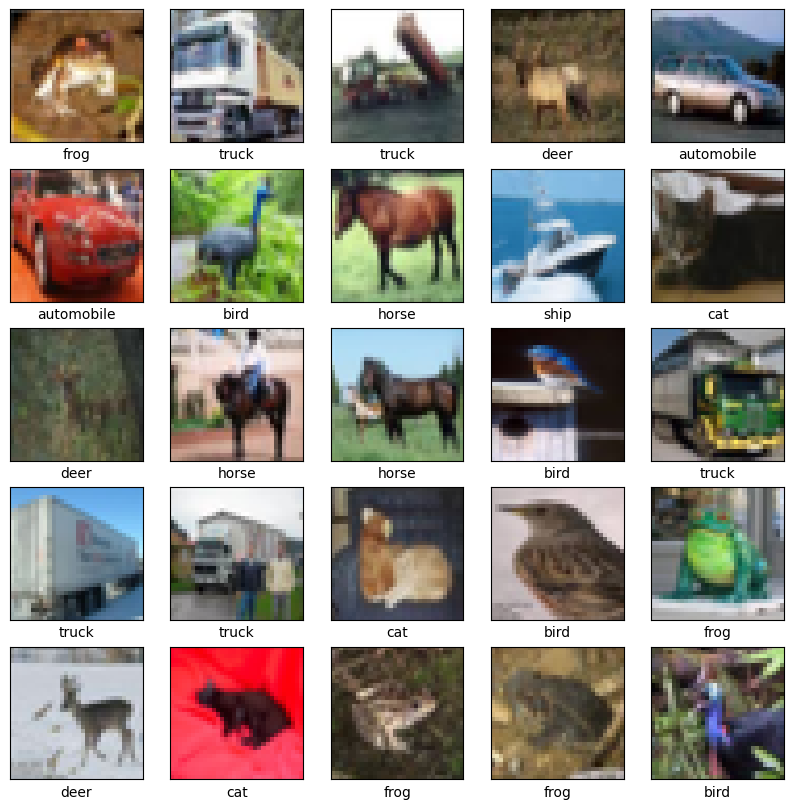

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

11. You can check various images by changing the index value, or by calling test_images. You can see that the pixel values fall in the range of 0 to 255. normalise train and test sets using the following code:



In [19]:
train_images = train_images / 255.0

12. First neural network definition with three layers and two activation functions



In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 32 by 32 pixels) to a one- dimensional array (of 32 × 32 = 1024 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully con- nected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes. In this exercise, we don’t explain the reasons of defining a neural network with this structure. For defining a network compatible with our data, we should define an input layer with the same size as the input data (images size) and an output corresponding the out put data (image labels).

13. Before the model is ready for training, it needs a few more settings. These are added during the model’s compile step:

Loss function: This measures how accurate the model is during training. You want to minimize this function to ”steer” the model in the right direction.

Optimizer: This is how the model is updated based on the data it sees and its loss function.

Metrics: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

14. Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train images and train labels arrays.

The model learns to associate images and labels.

You ask the model to make predictions about a test set, in this example, the test images array. Verify that the predictions match the labels from the test labels array.

In [22]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
model.fit(train_images , train_labels , epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 11ms/step - loss: 1.8888 - accuracy: 0.3190
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7505 - accuracy: 0.3720
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7083 - accuracy: 0.3849
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6842 - accuracy: 0.3946
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6649 - accuracy: 0.4017
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6502 - accuracy: 0.4085
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6431 - accuracy: 0.4111
Epoch 8/10
1563/1563 [==============================] - 13s 9ms/step - loss: 1.6331 - accuracy: 0.4135
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6229 - accuracy: 0.4191
Epoch 10/10
1563/1563 [==============================] - 13s 9ms/step - 

15. It is the moment for checking the model performance on the test dataset.



In [24]:
test_loss , test_acc = model.evaluate(test_images , test_labels ,
verbose =2)

313/313 - 2s - loss: 213.7422 - accuracy: 0.3515 - 2s/epoch - 6ms/step


16. With the model trained, we can use it to make predictions about some images.



In [25]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


17. Write a function for checking the predicted labels. The result should be similar to the Figure below with a label indicating the probability of the predicted label with blue color if the prediction is correct otherwise in the red color?



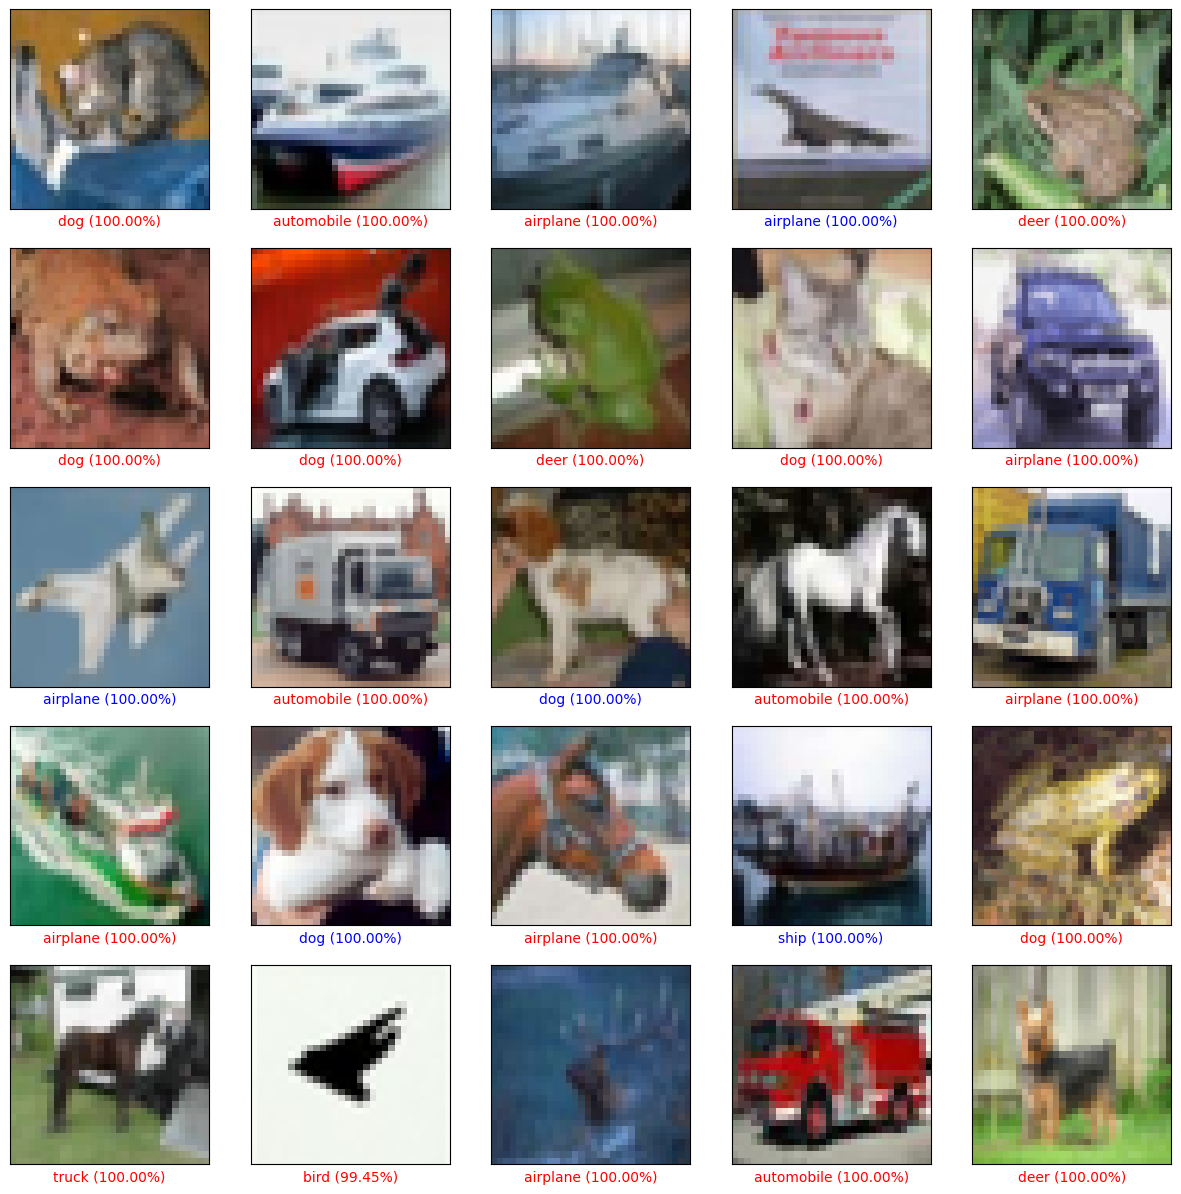

In [26]:
def check_predicted_labels(predictions, test_labels, class_names):
    plt.figure(figsize=(15, 15))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        predicted_label = np.argmax(predictions[i])
        true_label = test_labels[i][0]
        confidence = predictions[i][predicted_label]

        if predicted_label == true_label:
            color = 'blue'
        else:
            color = 'red'

        plt.imshow(test_images[i])
        plt.xlabel(f"{class_names[predicted_label]} ({100 * confidence:.2f}%)", color=color)
    plt.show()

# Call the function to check predicted labels
check_predicted_labels(predictions, test_labels, class_names)


18. Grab a single element from the test set such as test_images[5]. Send it to the model.predict() and check what will happen. Why? Correct it by your modification. (hint: you can use expand_dims())



In [27]:
# Grab a single element from the test set
single_test_image = test_images[5]

# Expand the dimensions to create a batch of size 1
single_test_image = np.expand_dims(single_test_image, axis=0)

# Make predictions for the single image
predictions_single = model.predict(single_test_image)

# Find the predicted label for the single image
predicted_label_single = np.argmax(predictions_single[0])

# Display the predicted label
print(f"Predicted Label: {class_names[predicted_label_single]}")


1/1 [==============================] - 0s 41ms/step
Predicted Label: dog


19. Respecting input and output sizes, try to change your model structure in exercises 12 and 13 and observe their affections on prediction precision.

In [33]:
# Original Model (Exercise 12):

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

In [34]:
# Modified Model 1:

model_m1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

In [35]:
# Modified Model 2:

model_m2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

ValueError: ignored

In [36]:
# Compile and train the original model or modified models

# Original Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

# Modified Model 1
model_m1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

# Modified Model 2
model_m2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

# Evaluate the models on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print the test accuracy for each model
print("Test Accuracy - Original Model:", test_acc)


Epoch 1/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.8959 - accuracy: 0.3191
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7559 - accuracy: 0.3741
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7011 - accuracy: 0.3933
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6700 - accuracy: 0.4073
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6464 - accuracy: 0.4156
Epoch 6/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6317 - accuracy: 0.4195
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6124 - accuracy: 0.4277
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5989 - accuracy: 0.4325
Epoch 9/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5857 - accuracy: 0.4374
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step

NameError: ignored

# Sentiment Analysis
In this exercise, you’ll build a neural network using Keras to classify texts into ones with positive and negative sentiments; sentiment analysis.

Import the necessary Libraries

In [47]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

1. Load the IMDB dataset

In [48]:
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

2. Take only the first 10000 words from each data sample. This reduces the size of our final model during training.

In [49]:
data = pad_sequences(data, maxlen=10000, padding='post', truncating='post')
#already did in 1

In [41]:
len(data)

10000

3. Build your Neural Network model



In [50]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

4. Compile your model



In [51]:
# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

5. Fit your model, and get its final accuracy



In [52]:
# Fit your model
model.fit(data, targets, epochs=10, batch_size=512, validation_split=0.2)
final_accuracy = model.evaluate(data, targets)[1]



print(f"Final Accuracy: {final_accuracy*100:.2f}%")

Epoch 1/10
79/79 [==============================] - 6s 63ms/step - loss: 4.5202 - accuracy: 0.5002 - val_loss: 0.7041 - val_accuracy: 0.5075
Epoch 2/10
79/79 [==============================] - 8s 97ms/step - loss: 0.6995 - accuracy: 0.5057 - val_loss: 0.7000 - val_accuracy: 0.4968
Epoch 3/10
79/79 [==============================] - 4s 48ms/step - loss: 0.6957 - accuracy: 0.5050 - val_loss: 0.6988 - val_accuracy: 0.4969
Epoch 4/10
79/79 [==============================] - 3s 41ms/step - loss: 0.6935 - accuracy: 0.5054 - val_loss: 0.7132 - val_accuracy: 0.4924
Epoch 5/10
79/79 [==============================] - 3s 44ms/step - loss: 0.6940 - accuracy: 0.5053 - val_loss: 0.6989 - val_accuracy: 0.4955
Epoch 6/10
79/79 [==============================] - 5s 58ms/step - loss: 0.6924 - accuracy: 0.5059 - val_loss: 0.7004 - val_accuracy: 0.4912
Epoch 7/10
79/79 [==============================] - 4s 46ms/step - loss: 0.6922 - accuracy: 0.5073 - val_loss: 0.7014 - val_accuracy: 0.4936
Epoch 8/10
79

# Regression
In this exercise, you will create a regressor on the Boston housing Dataset, a task that you’ve previously accomplished using linear regression and decision trees. only this time, you’ll accomplish it using Keras neural networks.

Import the Boston Housing dataset.

1. Visualize each feature and label in your data using a scatterplot. This will help in finding which features, if any, contain outliers. It will also assist in finding potential strong correlations between features.

In [57]:
!pip install scikit-learn==1.1.3

from sklearn.datasets import load_boston
boston = load_boston()

In [54]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Epoch 1/100
11/11 [==============================] - 2s 40ms/step - loss: 594.0328 - val_loss: 516.3311
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 553.7980 - val_loss: 476.8713
Epoch 3/100
11/11 [==============================] - 0s 17ms/step - loss: 507.3723 - val_loss: 428.4655
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 447.0102 - val_loss: 363.8658
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 369.7739 - val_loss: 286.3354
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 280.0061 - val_loss: 204.9877
Epoch 7/100
11/11 [==============================] - 0s 10ms/step - loss: 192.5829 - val_loss: 130.8457
Epoch 8/100
11/11 [==============================] - 0s 17ms/step - loss: 123.7888 - val_loss: 78.2277
Epoch 9/100
11/11 [==============================] - 0s 11ms/step - loss: 80.3278 - val_loss: 50.5212
Epoch 10/100
11/11 [==============================] - 0s 17ms/step -

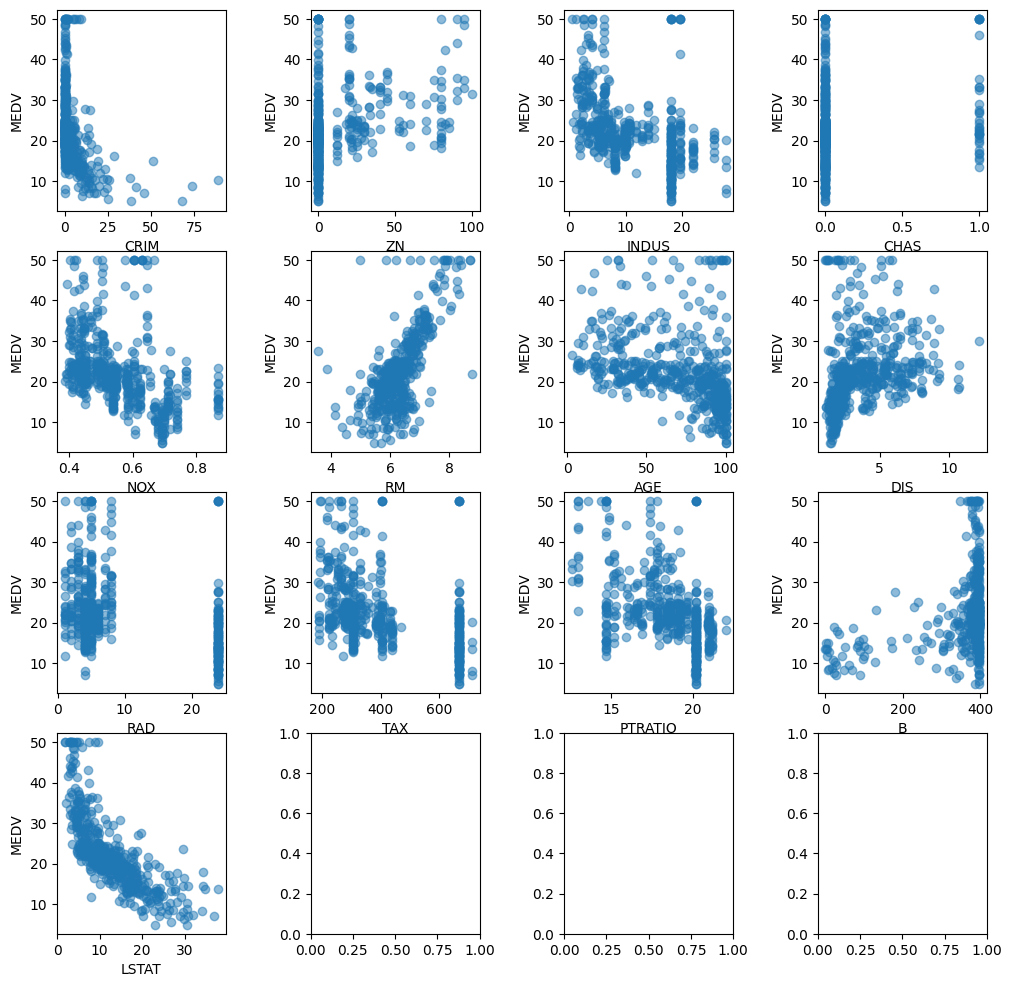

In [58]:
data, target = boston.data, boston.target

# Visualize each feature and label using scatterplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.subplots_adjust(wspace=0.5)
for i in range(13):
    row, col = i // 4, i % 4
    axes[row, col].scatter(data[:, i], target, alpha=0.5)
    axes[row, col].set_xlabel(boston.feature_names[i])
    axes[row, col].set_ylabel("MEDV")

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Normalize your training and testing subsets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple neural network regressor
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Data: {loss}")


4. Build your keras neural network model. Create a Sequential model, and make it only with 3 layers: an input (Dense) layer with 128 neurons, a hidden (Dense) layer with 64 neurons, both using a ReLU (Rectified Linear Unit) activation function, and a dense layer with a linear activation will be used as output layer.



In [59]:
from keras.models import Sequential
from keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(128, activation='relu', input_shape=(13,)))  # Input layer with 128 neurons and ReLU activation
model.add(Dense(64, activation='relu'))  # Hidden layer with 64 neurons and ReLU activation
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

5. Compile your model and view its summary.



In [60]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1792      
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


7. Evaluate your model using model.evaluate



In [61]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 [==============================] - 0s 5ms/step - loss: 537.3219 - mae: 21.4807
Mean squared error on test data:  537.3218994140625
Mean absolute error on test data:  21.4807071685791


8. Compare your model’s performance vs that of an sklearn Linear Regression model



In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate your Keras neural network model
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data (Keras NN): ', mse_nn)
print('Mean absolute error on test data (Keras NN): ', mae_nn)

# Create and evaluate an scikit-learn Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print('Mean squared error on test data (Linear Regression): ', mse_lr)
print('Mean absolute error on test data (Linear Regression): ', mae_lr)


4/4 [==============================] - 0s 7ms/step - loss: 537.3219 - mae: 21.4807
Mean squared error on test data (Keras NN):  537.3218994140625
Mean absolute error on test data (Keras NN):  21.4807071685791
Mean squared error on test data (Linear Regression):  24.291119474973513
Mean absolute error on test data (Linear Regression):  3.189091965887848


The results suggest that, for this specific dataset and task, the scikit-learn Linear Regression model outperforms the Keras neural network model in terms of accuracy, as it has lower MSE and MAE values. Lower MSE and MAE indicate better predictive performance, with predictions closer to the actual values.

# Case study


Generating some data
Lets generate a classification dataset that is not easily linearly separable. Our favorite example is the spiral dataset, which can be generated as follows:

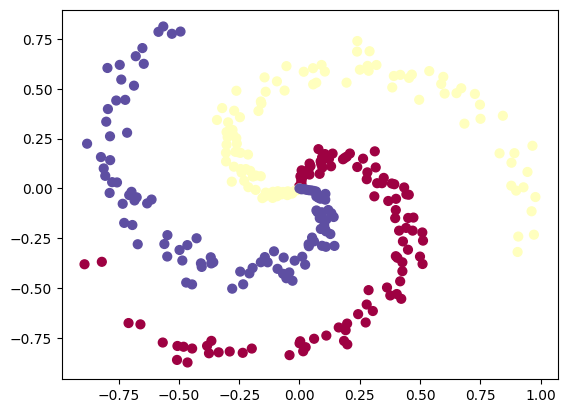

In [63]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

Training a Softmax Linear Classifier

Initialize the parameters
Lets first train a Softmax classifier on this classification dataset. As we saw in the previous sections, the Softmax classifier has a linear score function and uses the cross-entropy loss. The parameters of the linear classifier consist of a weight matrix W and a bias vector b for each class. Lets first initialize these parameters to be random numbers:

In [64]:
# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

Compute the class scores

Since this is a linear classifier, we can compute all class scores very simply in parallel with a single matrix multiplication:

In [65]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

Compute the loss


In [66]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [67]:
correct_logprobs = -np.log(probs[range(num_examples),y])

In [69]:
# compute the loss: average cross-entropy loss and regularization

reg = 0.01 # usual value

data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

Computing the Analytic Gradient with Backpropagation


In [70]:
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [71]:
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

Performing a parameter update


In [73]:
# perform a parameter update

step_size = 0.001

W += -step_size * dW
b += -step_size * db

Putting it all together: Training a Softmax Classifier


In [75]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.097690
iteration 10: loss 0.906892
iteration 20: loss 0.835754
iteration 30: loss 0.803382
iteration 40: loss 0.786500
iteration 50: loss 0.776860
iteration 60: loss 0.771001
iteration 70: loss 0.767274
iteration 80: loss 0.764822
iteration 90: loss 0.763167
iteration 100: loss 0.762025
iteration 110: loss 0.761225
iteration 120: loss 0.760657
iteration 130: loss 0.760249
iteration 140: loss 0.759953
iteration 150: loss 0.759737
iteration 160: loss 0.759579
iteration 170: loss 0.759462
iteration 180: loss 0.759375
iteration 190: loss 0.759310


In [76]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.51


# Training a Neural Network


In [77]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

In [78]:
# evaluate class scores with a 2-layer Neural Network
hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2

In [79]:
# backpropate the gradient to the parameters
# first backprop into parameters W2 and b2
dW2 = np.dot(hidden_layer.T, dscores)
db2 = np.sum(dscores, axis=0, keepdims=True)

In [80]:
dhidden = np.dot(dscores, W2.T)

In [81]:
# backprop the ReLU non-linearity
dhidden[hidden_layer <= 0] = 0

In [82]:
# finally into W,b
dW = np.dot(X.T, dhidden)
db = np.sum(dhidden, axis=0, keepdims=True)

In [84]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098697
iteration 1000: loss 0.323414
iteration 2000: loss 0.256735
iteration 3000: loss 0.245529
iteration 4000: loss 0.243879
iteration 5000: loss 0.243516
iteration 6000: loss 0.243249
iteration 7000: loss 0.243018
iteration 8000: loss 0.242950
iteration 9000: loss 0.242924


In [86]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


Waw, i am impressed

# Summary

We’ve worked with a toy 2D dataset and trained both a linear network and a 2-layer Neural Network. We saw that the change from a linear classifier to a Neural Network involves very few changes in the code. The score function changes its form (1 line of code difference), and the backpropagation changes its form (we have to perform one more round of backprop through the hidden layer to the first layer of the network).

